<a href="https://colab.research.google.com/github/mar-valeria/Aprendizaje-automatico/blob/main/Agrupamiento%20Kmeans/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [19]:
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva

from sklearn.preprocessing import StandardScaler  # Estandarización de datos

from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.metrics import silhouette_score #silueta

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [2]:
# Leer los datos
url = "https://raw.githubusercontent.com/mar-valeria/Aprendizaje-automatico/refs/heads/main/Add_dataset%20_mental_health"
data = pd.read_csv(url, sep=';')
# Tomo las columnas de interés
numeric_cols = ['stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score','anxiety_score', 'social_support_score','productivity_score']
data = data[numeric_cols]
display(data.head())

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
0,6,6.2,3,28,17,54,59.7
1,10,9.0,4,30,11,85,54.9
2,7,7.7,2,24,7,62,61.3
3,4,4.5,4,6,0,95,97.0
4,3,5.4,0,24,12,70,69.0


In [4]:
# Descripción de los datos
data.describe()

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [5]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


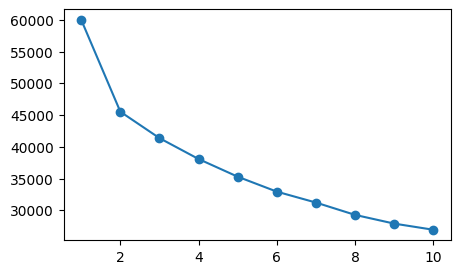

In [6]:
# Metodo del codo
inertia = []
for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=42)
    modelo.fit(X)
    inertia.append(modelo.inertia_)
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')

k=4 puede considerarse como el número optimo de cluster, debido a que se observa una caída significativa hasta ese punto.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [8]:
# Realizamos el agrupamiento
modelo = KMeans(n_clusters=4, random_state=42)
modelo.fit(X)

# Asignamos las etiquetas
labels = modelo.labels_

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in labels]

# Revisar los primeros registros
display(data.head())

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
0,6,6.2,3,28,17,54,59.7,C0
1,10,9.0,4,30,11,85,54.9,C2
2,7,7.7,2,24,7,62,61.3,C2
3,4,4.5,4,6,0,95,97.0,C3
4,3,5.4,0,24,12,70,69.0,C0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

C0 – Estrés moderado / productividad media
- Presenta niveles intermedios de estrés y ansiedad, con productividad y apoyo social promedio.

C1 – Bajo bienestar emocional
- Se caracteriza por mayor estrés, depresión y ansiedad, junto con menor productividad y apoyo social.

C2 – Bienestar medio
- Grupo relativamente equilibrado: estrés controlado, sueño aceptable y productividad estable.

C3 – Alto bienestar y alto rendimiento
- Bajo estrés y síntomas emocionales, alto apoyo social y mayor productividad.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

In [10]:
# Mostremos los nombres de 5 pokemones de cada clúster
for cluster in data['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C0: cantidad de elementos 2539


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
0,6,6.2,3,28,17,54,59.7,C0
4,3,5.4,0,24,12,70,69.0,C0
6,2,5.5,1,25,3,87,63.1,C0
7,8,7.1,5,25,8,72,58.4,C0
8,7,6.5,6,28,6,46,60.4,C0


Cluster C2: cantidad de elementos 2279


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
1,10,9.0,4,30,11,85,54.9,C2
2,7,7.7,2,24,7,62,61.3,C2
5,3,9.9,3,17,9,63,69.3,C2
10,6,9.7,2,14,9,85,71.2,C2
12,10,6.5,1,15,17,43,79.6,C2


Cluster C3: cantidad de elementos 2624


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
3,4,4.5,4,6,0,95,97.0,C3
9,8,3.1,0,7,18,88,93.2,C3
16,2,8.7,2,14,6,64,85.8,C3
18,9,8.2,5,3,14,99,84.8,C3
19,8,7.3,6,2,8,68,98.6,C3


Cluster C1: cantidad de elementos 2558


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
13,5,5.1,6,5,7,6,93.0,C1
20,9,5.6,2,12,8,22,81.4,C1
21,5,5.8,1,11,4,41,84.0,C1
23,8,6.5,7,4,21,14,96.7,C1
26,9,7.0,7,0,2,17,89.9,C1


In [16]:
# Definir nombres para los 4 clusters (ajusta si tus etiquetas son distintas)
cluster_names = {
    'C0': 'Estrés moderado',
    'C1': 'Bajo bienestar emocional',
    'C2': 'Bienestar medio',
    'C3': 'Alto bienestar y productividad'
}

# Crear columna con nombre del cluster
data['Cluster_name'] = data['Cluster'].map(cluster_names).fillna('Cluster sin nombre')

# PCA a 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = data['Cluster'].values
df_pca['Cluster_name'] = data['Cluster_name'].values

# Scatter interactivo
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster_name',  # aquí se ven los nombres
    hover_data=['Name', 'Cluster'] if 'Name' in df_pca.columns else ['Cluster'],
    title='Clústeres visualizados en 2D (PCA)'
)

# Ajustes visuales
fig.update_traces(marker=dict(size=8, opacity=0.8))
fig.update_layout(
    width=800,
    height=600,
    legend_title_text='Cluster'
)

fig.show()


Varianza explicada PC1: 32.33%
Varianza explicada PC2: 17.02%
Varianza total (PC1+PC2): 49.35%


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [20]:
# Varianza explicada
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada PC1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada PC2: {var_exp[1]*100:.2f}%")
print(f"Varianza total (PC1+PC2): {(var_exp[0]+var_exp[1])*100:.2f}%")

Varianza explicada PC1: 32.33%
Varianza explicada PC2: 17.02%
Varianza total (PC1+PC2): 49.35%


Los clusters muestran una separación aceptable, aunque existe solapamiento entre estrés moderado y bienestar medio. Los grupos de alto bienestar y bajo bienestar emocional se distinguen mejor.
La varianza explicada total es 49.35% (PC1 + PC2), por lo que el gráfico no representa toda la información original. Esto sí afecta la visualización, ya que parte de la variabilidad se pierde al usar PCA.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [22]:
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f"Coeficiente de silueta: {silhouette_avg:.3f}")

Coeficiente de silueta: 0.140


El coeficiente de silueta obtenido es 0.140. Por lo tanto, la calidad del agrupamiento puede considerarse regular a baja, coherente con lo observado en la visualización en PCA.